<a href="https://colab.research.google.com/github/mnslarcher/cs224w-machine-learning-with-graphs/blob/main/notebooks/01_introduction_machine_learning_for_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Components of a Network

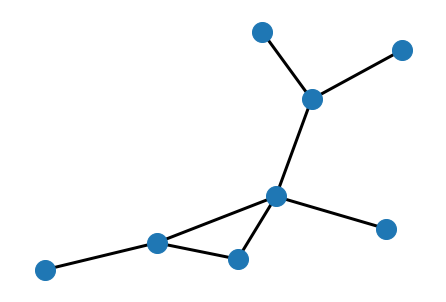

In [2]:
edge_list = [(0, 1), (1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (5, 6), (5, 7)]
G = nx.Graph(edge_list)
nx.draw(G, node_color="tab:blue", node_size=400, width=3)

In [3]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7))

In [4]:
G.edges

EdgeView([(0, 1), (1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (5, 6), (5, 7)])

# Directed vs. Unidirected Graphs

## Undirected

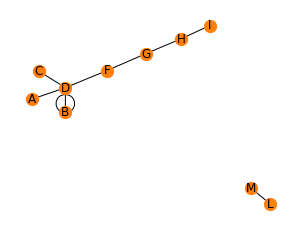

In [5]:
edge_list = [
    ("A", "D"), 
    ("B", "B"), 
    ("B", "D"), 
    ("C", "D"), 
    ("C", "D"),
    ("D", "F"), 
    ("F", "G"), 
    ("G", "H"), 
    ("H", "I"),
    ("L", "M")
]
G = nx.Graph(edge_list)

plt.figure(figsize=(4, 3))
# NetworkX does not represent multiple edges between two nodes well
nx.draw(G, node_color="tab:orange", node_size=150, with_labels=True)

## Directed

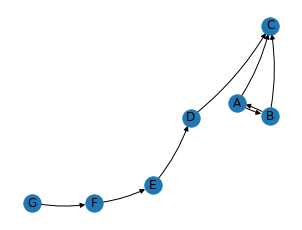

In [6]:
edge_list = [
    ("A", "B"), 
    ("A", "C"), 
    ("B", "A"), 
    ("B", "C"), 
    ("D", "C"),
    ("E", "D"), 
    ("F", "E"), 
    ("G", "F"),
]
G = nx.MultiDiGraph(edge_list)

plt.figure(figsize=(4, 3))
nx.draw(G, node_color="tab:blue", with_labels=True, connectionstyle="arc3, rad = 0.1")

# Heterogeneous Graphs

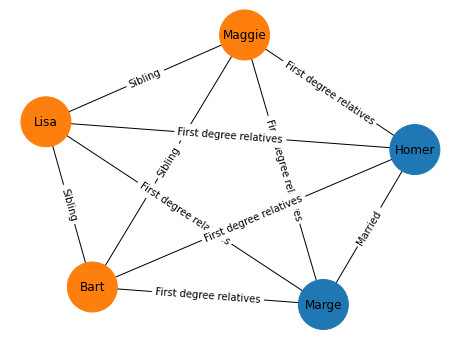

In [7]:
edge_list = [
    ("Marge", "Homer", {"relation_type": "Married"}),
    ("Marge", "Lisa", {"relation_type": "First degree relatives"}),
    ("Marge", "Bart", {"relation_type": "First degree relatives"}),
    ("Marge", "Maggie", {"relation_type": "First degree relatives"}),
    ("Homer", "Lisa", {"relation_type": "First degree relatives"}),
    ("Homer", "Bart", {"relation_type": "First degree relatives"}),
    ("Homer", "Maggie", {"relation_type": "First degree relatives"}),
    ("Lisa", "Bart", {"relation_type": "Sibling"}),
    ("Lisa", "Maggie", {"relation_type": "Sibling"}),
    ("Bart", "Maggie", {"relation_type": "Sibling"}),
]
G = nx.Graph(edge_list)
node_attributes = {
    "Marge": {"node_type": "Adult"},
    "Homer": {"node_type": "Adult"},
    "Lisa": {"node_type": "Child"},
    "Bart": {"node_type": "Child"},
    "Maggie": {"node_type": "Child"},
}
nx.set_node_attributes(G, node_attributes)

node_type_to_color = {"Adult": "tab:blue", "Child": "tab:orange"}
node_color = [node_type_to_color[node_type] for label, node_type in nx.get_node_attributes(G, "node_type").items()]
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, "relation_type")

plt.figure(figsize=(8, 6))
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, pos=pos, node_color=node_color, node_size=2500, with_labels=True)

# Node Degrees

## Undirected

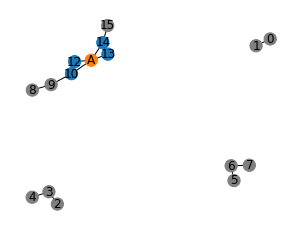


Node degree, kA: 4
Avg. degree: 1.75


In [8]:
edge_list = [
    (0, 1),
    (2, 3),
    (3, 4),
    (5, 6),
    (6, 7),
    (8, 9),
    (9, 10),
    (10, "A"),
    (10, 12),
    ("A", 12),
    ("A", 13),
    ("A", 14),
    (13, 14),
    (14, 15),
]
G = nx.Graph(edge_list)

label_to_color = {10: "tab:blue", "A": "tab:orange", 12: "tab:blue", 13: "tab:blue", 14: "tab:blue"}
node_color = [label_to_color.get(node, "tab:grey") for node in G.nodes()]

plt.figure(figsize=(4, 3))
nx.draw(G, node_size=150, node_color=node_color, with_labels=True)
plt.show()

avg_degree = 2 * G.number_of_edges() / G.number_of_nodes()
print(f"\nNode degree, kA: {G.degree['A']}")
print(f"Avg. degree: {avg_degree:.2f}")

## Directed

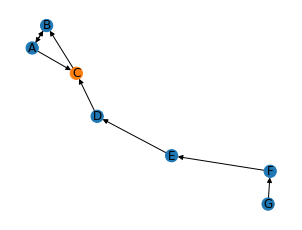


Node in-degree, kC: 2
Node out-degree, kC: 1
Node degree, kC: 3
Avg. degree: 1.14


In [9]:
edge_list = [
    ("A", "B"),
    ("A", "C"),
    ("B", "A"),
    ("C", "B"),
    ("D", "C"),
    ("E", "D"),
    ("F", "E"),
    ("G", "F"),
]
G = nx.DiGraph(edge_list)

label_to_color = {"C": "tab:orange"}
node_color = [label_to_color.get(node, "tab:blue") for node in G.nodes()]

plt.figure(figsize=(4, 3))
nx.draw(G, node_size=150, node_color=node_color, with_labels=True)
plt.show()

avg_degree = G.number_of_edges() / G.number_of_nodes()
print(f"\nNode in-degree, kC: {G.in_degree['C']}")
print(f"Node out-degree, kC: {G.out_degree['C']}")
print(f"Node degree, kC: {G.degree['C']}")
print(f"Avg. degree: {avg_degree:.2f}")

# Bipartite Graph

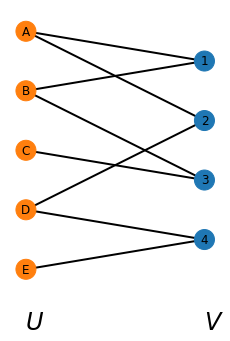

In [10]:
G = nx.Graph()
# Add nodes with the node attribute "bipartite"
G.add_nodes_from(["A", "B", "C", "D", "E"], bipartite=0)
G.add_nodes_from([1, 2, 3, 4], bipartite=1)
# Add edges only between nodes of opposite node sets
G.add_edges_from([("A", 1), ("A", 2), ("B", 1), ("B", 3), ("C", 3), ("D", 2), ("D", 4), ("E", 4)])

node_type_to_color = {0: "tab:orange", 1: "tab:blue"}
node_color = [node_type_to_color[node_type] for label, node_type in nx.get_node_attributes(G, "bipartite").items()]

# The following part is adapted from: https://stackoverflow.com/a/27085151
U, V = nx.bipartite.sets(G)
pos = dict()
pos.update((n, (1, i)) for i, n in enumerate(sorted(U, reverse=True), 1)) # put nodes from U at x=1
pos.update((n, (2, i + 0.5)) for i, n in enumerate(sorted(V, reverse=True), 1)) # put nodes from V at x=2

plt.figure(figsize=(3, 4))
nx.draw(G, pos=pos, node_size=400, node_color=node_color, width=2, with_labels=True)
plt.text(1, 0, "U", size=24, fontstyle="oblique")
plt.text(2, 0, "V", size=24, fontstyle="oblique")
plt.show()